# Análise Exploratória das bases de dados

Importa as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carrega a base de dados de localização da Apple

In [2]:
# The code was removed by Watson Studio for sharing.

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,162.41,164.63,169.36,190.83,206.45,202.15,178.29,168.26,169.05,176.53
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,127.42,128.96,131.30,133.39,137.95,116.08,134.41,131.60,125.50,121.19
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,54.61,55.66,57.26,67.02,63.70,37.80,53.91,56.84,58.40,59.01
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,43.16,41.49,42.23,49.10,46.25,32.78,41.44,44.63,46.32,46.18
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,92.33,93.33,98.55,98.50,75.84,83.95,87.17,91.46,92.73,98.44


Gera um dataframe contendo somente os dados da cidade de São Paulo

In [3]:
locomocao_sp = locomocao_apple.loc[locomocao_apple['region']=='Sao Paulo']
locomocao_sp.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30
789,city,Sao Paulo,driving,São Paulo,São Paulo (state),Brazil,100.0,103.97,104.59,104.15,...,79.83,80.79,83.03,88.98,87.44,63.17,78.90,82.28,79.23,78.21
790,city,Sao Paulo,transit,São Paulo,São Paulo (state),Brazil,100.0,103.28,107.25,101.29,...,49.69,47.30,46.33,44.39,35.66,28.52,50.76,52.03,47.19,44.60
791,city,Sao Paulo,walking,São Paulo,São Paulo (state),Brazil,100.0,111.06,110.09,100.63,...,56.45,58.81,57.09,58.60,57.08,33.36,56.14,60.45,54.66,52.58


Plota a série temporal para exibir o comportamento graficamente

In [4]:
last_day = locomocao_sp.columns.values[-1]
last_day

'2020-07-30'

In [5]:
# Cria um dataFrame com os dados de pedestres por dia e tipo de transporte
locomocao_sp = pd.concat([locomocao_sp.loc[:,'transportation_type'], locomocao_sp.loc[:,'2020-01-13':'2020-07-30']],axis=1)
# Seleciona as colunas que contém as datas
locomocao_sp = locomocao_sp.T
# Reseta o index
locomocao_sp.reset_index(level=0, inplace=True)
# Nomeia as colunas
locomocao_sp.columns = ['Data','porcentagemCarro','porcentagemTransportePublico','porcentagemPedestre']
locomocao_sp.drop([0],inplace=True)
#walking_sp.head()
locomocao_sp.head() 

,Data,porcentagemCarro,porcentagemTransportePublico,porcentagemPedestre
1,2020-01-13,100,100,100
2,2020-01-14,103.97,103.28,111.06
3,2020-01-15,104.59,107.25,110.09
4,2020-01-16,104.15,101.29,100.63
5,2020-01-17,109.81,96.59,105.01


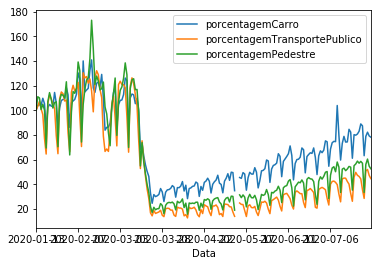

In [6]:
locomocao_sp.plot(x='Data')

### Tratamento de missing data

Exibe a infromações do dataset

In [7]:
locomocao_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Data                            200 non-null object
porcentagemCarro                198 non-null object
porcentagemTransportePublico    198 non-null object
porcentagemPedestre             198 non-null object
dtypes: object(4)
memory usage: 7.8+ KB


In [8]:
# Converte as colunas de porcentagem para o dtype float e preenche os valores faltantes por meio de uma interpolação linear
locomocao_sp['porcentagemCarro'] = locomocao_sp['porcentagemCarro'].astype(float)
locomocao_sp['porcentagemTransportePublico'] = locomocao_sp['porcentagemTransportePublico'].astype(float)
locomocao_sp['porcentagemPedestre'] = locomocao_sp['porcentagemPedestre'].astype(float)
locomocao_sp.interpolate(method ='linear', limit_direction ='forward', inplace=True)
# Exibe informações do dataFrame
locomocao_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Data                            200 non-null object
porcentagemCarro                200 non-null float64
porcentagemTransportePublico    200 non-null float64
porcentagemPedestre             200 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


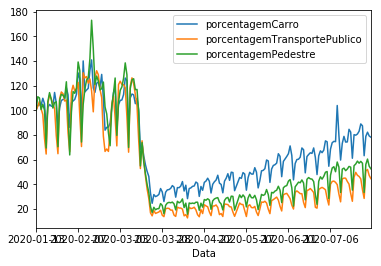

In [9]:
locomocao_sp.plot(x='Data')